# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
from datetime import datetime, timedelta

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWSAPI"])

In [4]:
# date var to keep date on 10/20/2020 for answers to be consistent, previoiusly used "from_param=datetime.today()"
date = pd.Timestamp("2020-10-20").utcoffset()

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin",
                                           from_param=date,
                                           language='en',
                                           sort_by='relevancy',
                                           page=1)


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum",
                                           from_param=date,
                                           language='en',
                                           sort_by='relevancy',
                                           page=1)


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['title'])
      
        bitcoin_sentiments.append({
            "Text": article["title"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.00,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...
1,0.3818,0.00,0.809,0.191,PayPal and Venmo will offer and accept cryptoc...
2,0.0000,0.00,1.000,0.000,Bitcoin Mixer Designed to Bypass Money Launder...
3,0.0000,0.00,1.000,0.000,PayPal’s Big Crypto Move Is All Hype
4,0.2023,0.13,0.685,0.185,"With Instagram, hashtags and bitcoin, young Ni..."


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['title'])
      
        ethereum_sentiments.append({
            "Text": article["title"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.0,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...
1,0.0000,0.0,1.000,0.000,Luxury watch maker Breitling issues digital ce...
2,0.0000,0.0,1.000,0.000,Getting Drawn Into DeFi? Here Are 3 Major Cons...
3,0.3818,0.0,0.809,0.191,PayPal and Venmo will offer and accept cryptoc...
4,0.4588,0.0,0.871,0.129,The world's largest digital currency asset man...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.192350,0.013500,0.858400,0.128150
std,0.254838,0.041584,0.178648,0.168477
min,0.000000,0.000000,0.519000,0.000000
25%,0.000000,0.000000,0.763750,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.304100,0.000000,1.000000,0.201750
max,0.670500,0.140000,1.000000,0.481000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.0,20.00000,20.00000
mean,0.208970,0.0,0.88935,0.11065
std,0.230410,0.0,0.12033,0.12033
min,0.000000,0.0,0.63300,0.00000
25%,0.000000,0.0,0.84200,0.00000
50%,0.226300,0.0,0.86700,0.13300
75%,0.386825,0.0,1.00000,0.15800
max,0.700300,0.0,1.00000,0.36700


### Questions:

Q: Which coin had the highest mean positive score on 10/20/20?

A: Bitcoin

Q: Which coin had the highest compound score on 10/20/20?

A: Ethereum

Q. Which coin had the highest positive score on 10/20/20?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
expanded_stopwords = ['btc', 'bitcoin', 'eth', 'ethereum', "'", ',', '$', '(', ')', '.']

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    text = word_tokenize(text)
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    # Remove the stop words
    sw = set(stopwords.words('english') + expanded_stopwords)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text]
    tokens = [word for word in text if word not in sw]
    return tokens


In [14]:
# Create a new tokens column for bitcoin
btc_tokens=[]
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.00,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,"[paypal, let, buy, sell, cryptocurrencies, us]"
1,0.3818,0.00,0.809,0.191,PayPal and Venmo will offer and accept cryptoc...,"[paypal, venmo, offer, accept, cryptocurrency,..."
2,0.0000,0.00,1.000,0.000,Bitcoin Mixer Designed to Bypass Money Launder...,"[mixer, designed, bypass, money, laundering, l..."
3,0.0000,0.00,1.000,0.000,PayPal’s Big Crypto Move Is All Hype,"[paypal, ’, big, crypto, move, hype]"
4,0.2023,0.13,0.685,0.185,"With Instagram, hashtags and bitcoin, young Ni...","[instagram, hashtags, young, nigerians, boost,..."


In [15]:
# Create a new tokens column for ethereum
eth_tokens=[]
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.0,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,"[paypal, let, buy, sell, cryptocurrencies, us]"
1,0.0000,0.0,1.000,0.000,Luxury watch maker Breitling issues digital ce...,"[luxury, watch, maker, breitling, issues, digi..."
2,0.0000,0.0,1.000,0.000,Getting Drawn Into DeFi? Here Are 3 Major Cons...,"[getting, drawn, defi, ?, 3, major, considerat..."
3,0.3818,0.0,0.809,0.191,PayPal and Venmo will offer and accept cryptoc...,"[paypal, venmo, offer, accept, cryptocurrency,..."
4,0.4588,0.0,0.871,0.129,The world's largest digital currency asset man...,"[world, 's, largest, digital, currency, asset,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('paypal', 'let'): 1,
 ('let', 'buy'): 1,
 ('buy', 'sell'): 1,
 ('sell', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'us'): 1}

In [18]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('paypal', 'let'): 1,
 ('let', 'buy'): 1,
 ('buy', 'sell'): 1,
 ('sell', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'us'): 1}

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('-', 9),
 ('’', 8),
 ('paypal', 7),
 ('reuters', 7),
 (':', 6),
 ('satoshi', 5),
 ('nakaboto', 5),
 ('‘', 5),
 ('cryptocurrencies', 4),
 ('accept', 4)]

In [21]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('paypal', 8),
 ('cryptocurrency', 5),
 ('allow', 5),
 ('buying', 4),
 ('selling', 4),
 ('shopping', 4),
 ('network', 4),
 ('-', 4),
 ('reuters', 4),
 ('cryptocurrencies', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

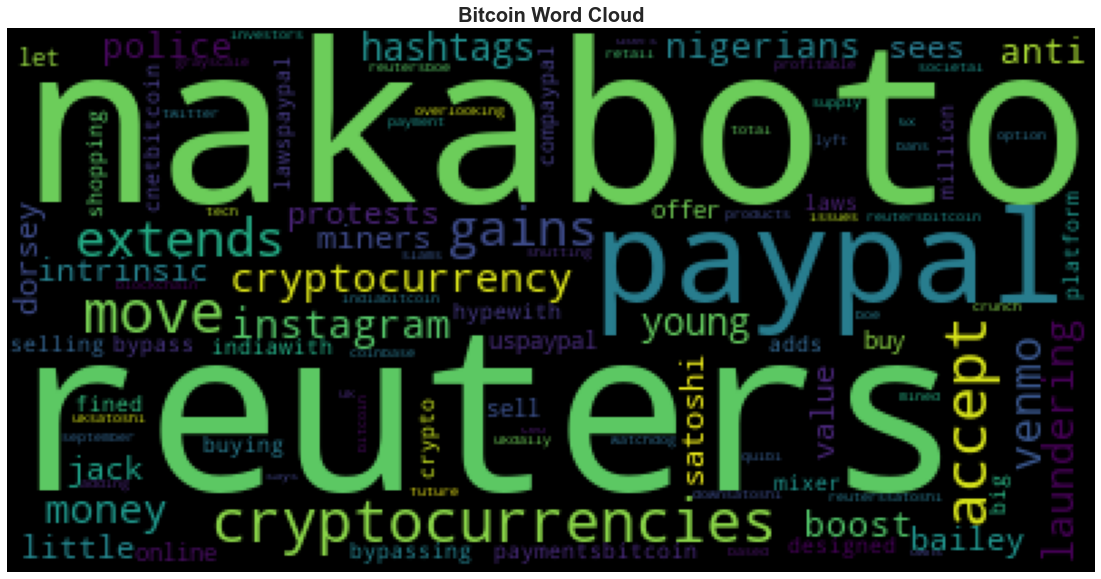

In [23]:
# Generate the Bitcoin word cloud
btc_corpus=''
sw = set(stopwords.words('english') + expanded_stopwords)
for token in btc_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=20, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

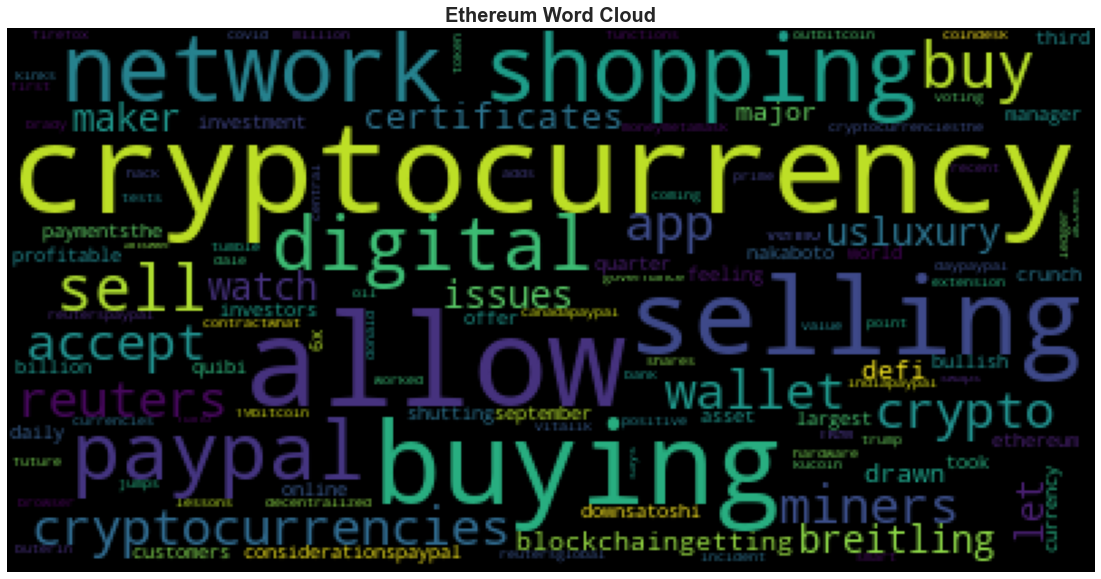

In [24]:
# Generate the Ethereum word cloud
eth_corpus=''
sw = set(stopwords.words('english') + expanded_stopwords)
for token in eth_df.Text:
    eth_corpus += token
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Ethereum Word Cloud', fontsize=20, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm - DONE

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
btc_corpus

"PayPal to let you buy and sell cryptocurrencies in the USPayPal and Venmo will offer and accept cryptocurrency for all online paymentsBitcoin Mixer Designed to Bypass Money Laundering Laws Fined $60 Million for Bypassing Money Laundering LawsPayPal’s Big Crypto Move Is All HypeWith Instagram, hashtags and bitcoin, young Nigerians boost anti-police protests - Reuters IndiaWith Instagram, hashtags and bitcoin, young Nigerians boost anti-police protests - Reuters.comPayPal adds cryptocurrency buying, selling and shopping to its platform - CNETBitcoin extends gains after PayPal move to accept cryptocurrencies - ReutersBitcoin extends gains after PayPal move to accept cryptocurrencies - Reuters IndiaBitcoin extends gains after PayPal move to accept cryptocurrencies - Reuters UKSatoshi Nakaboto: ‘Jack Dorsey slams Coinbase CEO for overlooking its users’ societal issues’BoE's Bailey sees little intrinsic value in Bitcoin - ReutersBoE's Bailey sees little intrinsic value in Bitcoin - Reuters 

In [29]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
# Add a title to the document
btc_ner.user_data['title'] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [31]:
# List all Entities
btc_entities = set([ent.text for ent in btc_ner.ents ])
btc_entities

{'$60 Million',
 '2.5%',
 '6x',
 '88%',
 'All HypeWith',
 'Bailey',
 'Bitcoin',
 "Bitcoin - ReutersBoE's",
 'Crypto Move',
 'Grayscale',
 'Jack Dorsey',
 'Jack Dorsey says’UK',
 'Mixer',
 'Nigerians',
 'PayPal',
 'Reuters IndiaBitcoin',
 'Twitter',
 'USPayPal',
 'Venmo',
 'bitcoin'}

---

## Ethereum NER

In [32]:
# Concatenate all of the bitcoin (eth?) text together
eth_corpus

"PayPal to let you buy and sell cryptocurrencies in the USLuxury watch maker Breitling issues digital certificates on the Ethereum blockchainGetting Drawn Into DeFi? Here Are 3 Major ConsiderationsPayPal and Venmo will offer and accept cryptocurrency for all online paymentsThe world's largest digital currency asset manager took in $1 billion in new investment in the third quarter. Here's why investors are feeling so bullish about bitcoin and ethereum.Daily Crunch: Quibi is shutting downSatoshi Nakaboto: ‘Ethereum miners were 6x more profitable than Bitcoin miners in September’PayPal to allow customers to buy and sell bitcoin and other cryptocurrenciesThe Ledger Nano S crypto hardware wallet is down to $40 for Prime DayPayPal to allow cryptocurrency buying, selling and shopping on its network - Reuters IndiaPayPal to allow cryptocurrency buying, selling and shopping on its network - Reuters CanadaPayPal to allow cryptocurrency buying, selling and shopping on its network - ReutersPayPal 

In [33]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
# Add a title to the document
eth_ner.user_data['title'] = "Ethereum NER"

In [34]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [35]:
# List all Entities
eth_entities = ([ent.text for ent in eth_ner.ents])
set(eth_entities)

{'$1 billion',
 '$150 Million',
 '40',
 '6x',
 'Bitcoin',
 'Brady Dale/CoinDesk)Voting',
 'Breitling',
 'Central Bank Digital Currencies',
 'ConsiderationsPayPal',
 'Donald Trump',
 'Firefox',
 'PayPal',
 'Reuters',
 'September’PayPal',
 'USLuxury',
 'Venmo',
 'Vitalik',
 'app',
 'bitcoin',
 'outBitcoin',
 'the Ethereum blockchainGetting Drawn Into DeFi',
 'the Future of MoneyMetaMask',
 'the third quarter',
 'token swaps'}